In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
import requests
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup as bsp
from time import sleep, time
from random import random
from timeit import timeit
import re
import matplotlib
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.metrics import mean_squared_error

%run CHROMEDRIVER_DATA.ipynb

In [2]:
basic_link="https://www.realtor.com"
listing_page="https://www.realtor.com/soldhomeprices/New-York_NY/pg-"

In [3]:
#Create some important vars.
all_pages=[]
links=[]
listing_pages=[]

In [4]:
def getURL(n):
    return(basic_link+links[n])

def sel(url, sleeptime=0, use_chrome=False):
    browser = None
    if use_chrome:
        browser = webdriver.Chrome(chrome_path)
    else:
        browser = webdriver.Safari()
    browser.get(url)
    if sleeptime>0:
        sleep(sleeptime)    
    code = browser.page_source    
    browser.close()
    return(code)

def req(url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    code=requests.get(url, headers=headers)
    return(code)

def soupIt(code):
    return (bsp(code, 'html.parser'))

def getAllPages(pages):
    webpages=[]
    for page in range(1,pages+1):
        url=listing_page+str(page)
        webpages.append(sel(url))
        
def getAllListings(code):
    
    temp_listings=[]
    
def startTimer():
    global start
    start=time()
    print('Timer started at system time',start)
    
def timeSince():
    print('Time elapsed:',time()-start)

def botDetected(code):
    bot_text='As you were browsing, something about your browser made us think you might be a bot.'
    if len(re.findall(bot_text,code))>0:
        return(True)
    return(False)

#Used to fix null neighborhood/borough values.
def geocode(address):
    address+=',New York City, NY'
    link='https://maps.googleapis.com/maps/api/geocode/json?address='
    key='&key=<API Key here>'
    address=address.replace(' ', '+')
    address=address.replace('#', '')
    r=requests.get(link+address+key)
    r=r.text
    r.replace('  ','')
    #r.split('Denied'
    
    if len(raw)==1:
        neighborhood="-3"
        borough=raw[0].split('long_name')[1].split('short_name')[0].replace("'",'').replace(":",'').replace('"','').replace(',','').strip()
    else:
        neighborhood=raw[0].split('long_name')[1].split('short_name')[0].replace("'",'').replace(":",'').replace('"','').replace(',','').strip()
        borough=raw[1].split('long_name')[1].split('short_name')[0].replace("'",'').replace(":",'').replace('"','').replace(',','').strip()
     
    return(neighborhood, borough)

def geocode_raw(address):
    address+=',New York City, NY'
    link='https://maps.googleapis.com/maps/api/geocode/json?address='
    key='&key=<API Key here>'
    address=address.replace(' ', '+')
    address=address.replace('#', '')
    r=requests.get(link+address+key)
    r=r.text
    r.replace('  ','')
    return(r)

# Data Scraping

In [5]:
#Takes about [A LONG FREAKING TIME] seconds to run
#Also your computer's out of commission for this time period thanks to the opening/closing of windows.
#I wouldn't recommend running this if you already have all_listing_pages.txt .
RESCRAPE_SEARCH_PAGES=False

if RESCRAPE_SEARCH_PAGES:
    startTimer()
    all_pages=getAllPages(225)
    timeSince()
    conglomerate=""
    for html in all_pages:
        conglomerate+=html
        conglomerate+="_split_this_html_code_with_python"
    with open('all_listing_pages.txt','w') as f:
        f.write(conglomerate)

In [6]:
#Takes about [70] seconds to run
RESET_PAGELIST=False

if RESET_PAGELIST:
    startTimer()
    f=open('all_listing_pages.txt','r')
    allcode=""
    for item in f:
        allcode+=item
    all_pages=allcode.split("_split_this_html_code_with_python")
    timeSince()

In [7]:
#Takes about [0.2] seconds to run
RECREATE_LINK_LIST=False

if RECREATE_LINK_LIST:
    startTimer()
    links=[]
    for page in all_pages:
        tempfindall=re.findall('(/realestateandhomes-detail/.+?)" data-featured',page)
        for link in tempfindall:
            links.append(link)
    with open('all_listing_links.txt','w') as f:
        for link in links:
            f.write(link+'\n')        
    timeSince()

In [8]:
#Takes about [0.01] seconds to run
RESET_LINK_LIST=True

if RESET_LINK_LIST:
    startTimer()
    links=[]
    f=open('all_listing_links.txt','r')
    for link in f:
        links.append(link.strip())
    timeSince()

Timer started at system time 1628258737.311023
Time elapsed: 0.0057010650634765625


In [9]:
#Takes about [I HAVE DONE NOTHING BUT SCRAPE LISTINGS FOR THE LAST THREE DAYS] seconds to run
#And I couldn't even walk away because Selenium kept running into bot-protection measures every 150 listings or so.
#I already have the HTML...don't run this if you value your time/sanity :( 

RESCRAPE_LISTINGS=False

if RESCRAPE_LISTINGS:
    startTimer() 
    stopVar=9900
    listing_code=listing_code[0:stopVar]
    for i in range(stopVar,9900):
        link_ext=links[i]
        print(i)
        listing_code.append(sel(basic_link+link_ext)) #,random()*1+2
    for html in listing_code:
        conglomerate+=html
        conglomerate+="_split_this_html_code_with_python"
    with open('all_listings.txt','w') as f:
        f.write(conglomerate)
    timeSince()

In [10]:
#Takes about [180] seconds to run
#Turns out GitHub doesn't let you upload files that are 4GB in size.
#Here's the code for extracting raw code from the HTML into a list.
#Even though I never used this because I ran out of RAM

RELOAD_RAW_CODE=False

if RELOAD_RAW_CODE:
    startTimer()
    all_listings_raw=[]
    with open('all_listings.txt','r') as f:
        conglomerate=""      
        counter=0
        for item in f:
            conglomerate+=item
            counter+=1
            if counter%100000==0:
                print(f'{counter/1000000}M complete')
                slicer=conglomerate.split("_split_this_html_code_with_python")
                print(len(slicer))
                all_listings_raw+=slicer[0:len(slicer)-1]
                conglomerate=slicer[len(slicer)-1]
                #print(conglomerate)
        slicer=conglomerate.split("_split_this_html_code_with_python")
        all_listings_raw+=slicer
    timeSince()

In [11]:
#Part 2 of reloading raw code

if RELOAD_RAW_CODE:
    startTimer()
    conglomerate=""
    counter=0
    for item in all_listings_raw:
        conglomerate+=item
        counter+=1
        if counter%10000==0:
            all_listings
    conglomerate.split("_split_this_html_code_with_python")
    timeSince()


In [12]:
#Cut out 75% of unneeded code so I can actually run my code instead of running out of RAM
SLICE_LISTING_CODE=False
if SLICE_LISTING_CODE:
    sliced=[]
    counter=0
    for listing in listing_code:
        cut=listing.split('Property History')[1]
        sliced.append(cut)
        counter+=1
        print(counter)

In [13]:
#Takes about [180] seconds to run
#Reload listing code from file.

RELOAD_SLICED_LISTINGS=False

if RELOAD_SLICED_LISTINGS:
    startTimer()
    templist=[]
    with open('all_listings_sliced.txt','r') as f:
        for item in f:
            templist.append(item)
    conglomerate=""   
    templist2=[]
    counter=len(templist)
    for item in templist:
        conglomerate+=item
        counter-=1
        if counter%500000==0:
            templist2.append(conglomerate)
            conglomerate=""
            print(f'{counter} lines left')
    templist=[]
    conglomerate=""
    counter=len(templist2)
    for item in templist2:
        conglomerate+=item
        counter-=1
        print(f'{counter} items left')
    templist2=[]
    listing_slice=conglomerate.split('_split_this_html_code_with_python')
    conglomerate=""    
    listing_slice=listing_slice[0:9900]
    timeSince()

# Cleaning Data

In [14]:
#Takes about [8] seconds to run
#Create a dataframe from HTML code.
RECREATE_LISTING_DATA=False

if RECREATE_LISTING_DATA:  
    startTimer()  
    listing_data={}
    listing_data['sqft']=[]#
    listing_data['beds']=[]#
    listing_data['baths']=[]#
    listing_data['lot_size']=[]#
    listing_data['year_built']=[]#
    listing_data['address']=[]#
    listing_data['property_type']=[]#
    listing_data['neighborhood']=[]#
    listing_data['borough']=[]#
    #listing_data['stories']=[]
    #listing_data['has_garage']=[]
    #listing_data['has_deck']=[]
    #listing_data['yard_type']=[]
    listing_data['sale_price']=[]

    for sliced in listing_slice:
        #PROPERTY TYPE
        code='''<i class="ra ra-property-type"></i>\n          <div>Type</div>\n          <div class="key-fact-data ellipsis" data-toggle="tooltip" data-placement="top" title="" data-original-title="(.+?)">(.+?)</div>'''
        type_raw=re.findall(code,sliced)
        if len(type_raw)!=0:
            listing_data['property_type'].append(type_raw[0][0])
        else:
            listing_data['property_type'].append("-1")

        #YEAR BUILT
        code='''<i class="ra ra-year-built"></i>\n          <div>Built</div>\n          <div class="key-fact-data ellipsis">([0-9]+)</div>'''
        year_raw=re.findall(code,sliced)
        if len(year_raw)!=0:
            listing_data['year_built'].append(year_raw[0])
        else:
            listing_data['year_built'].append(-1)

        #SQUARE FOOTAGE
        code='''<li data-label="property-meta-sqft">\n      <span class="data-value">([0-9,.]+)</span> sq ft'''
        sqft_raw=re.findall(code,sliced)
        if len(sqft_raw)>0:
            sqft_raw=float(sqft_raw[0].replace(',',''))
            listing_data['sqft'].append(sqft_raw)
        else:
            listing_data['sqft'].append(-1)

        #BEDROOMS
        code='''<li data-label="property-meta-beds">\n      <span class="data-value">([0-9.,]+)</span>'''
        beds_raw=re.findall(code,sliced)
        if len(beds_raw)>0:
            listing_data['beds'].append(float(beds_raw[0]))
        else:
            listing_data['beds'].append(-1)

        #BATHROOMS    
        code='''<li data-label="property-meta-bath">\n      <span class="data-value">([0-9.,]+)</span>'''
        baths_raw=re.findall(code,sliced)
        if len(baths_raw)>0:
            listing_data['baths'].append(float(baths_raw[0]))
        else:
            listing_data['baths'].append(-1)    

        #LOT SIZE
        code='''<li data-label="property-meta-lotsize">\n      <span class="data-value">.+</span>\n.+\n    </li>'''
        lotsize_raw=re.findall(code,sliced)
        #print(lotsize_raw)
        if len(lotsize_raw)>0:
            code='<span class="data-value">([0-9,.]+)</span>'
            acre=False
            acre=len(lotsize_raw[0].split('acre'))>1
            acre_to_sqft=43560.04
            lotsize_raw=re.findall(code, lotsize_raw[0])[0]
            lotsize_raw=float(lotsize_raw.replace(',',''))
            #Set a reasonable limit on lot size so listings accidentally mislabeled as "acres" won't ruin the data
            if acre and lotsize_raw<5:
                lotsize_raw*=acre_to_sqft
            listing_data['lot_size'].append(lotsize_raw)
        else:
            listing_data['lot_size'].append(-1)    

        #SALE PRICE
        code="Last Sold for.+?[$]([0-9,.]+)"
        sale_raw=re.findall(code,sliced)
        if len(sale_raw)>0:
            listing_data['sale_price'].append(float(sale_raw[0].replace(',','')))
        else:
            listing_data['sale_price'].append(-1) 

        #ADDRESS
        code='<span itemprop="streetAddress">(.+?),</span>' 
        address_raw=re.findall(code,sliced)
        if len(address_raw)>0:
            listing_data['address'].append(address_raw[0])
        else:
            listing_data['address'].append("-1")     

        #NEIGHBORHOOD/BOROUGH
        code="is located in <a href.+?>(.+?)</a> neighborhood in the city of <a href.+?>(.+?), NY." 
        area_raw=re.findall(code,sliced)
        if len(area_raw)>0:
            listing_data['neighborhood'].append(area_raw[0][0])
            listing_data['borough'].append(area_raw[0][1])
        else:
            listing_data['neighborhood'].append("-1")
            listing_data['borough'].append("-1")           

        listing_frame=pd.DataFrame.from_dict(listing_data, orient='columns')

        #Last "listing" is blank.
        listing_frame.drop([9899], inplace=True)
        
        #Blank addresses can't be used.
        listing_frame=listing_frame[listing_frame['address']=="-1"]
        
    timeSince()

In [15]:
#Takes about [0.15] seconds to run
#Save dataframe to CSV.

SAVE_LISTING_FRAME=False
if SAVE_LISTING_FRAME:
    startTimer()
    listing_frame.to_csv('listing_frame1.csv')
    timeSince()

In [16]:
#Takes about [0.07] seconds to run
#Load dataframe from CSV.

LOAD_LISTING_FRAME=False
if LOAD_LISTING_FRAME:
    startTimer()
    listing_frame=pd.read_csv('listing_frame1.csv')
    listing_frame.drop(['Unnamed: 0'], axis=1, inplace=True)
    timeSince()

In [17]:
#Fill in missing neighborhood/borough values

FILL_AREA_VALUES=False

if FILL_AREA_VALUES:
    startTimer()
    for i in range(len(listing_frame['neighborhood'])):
        if listing_frame.iloc[i]['neighborhood']=="-1" or listing_frame.iloc[i]['borough']=="-1":
            print(i)
            area=geocode(listing_frame.iloc[i]['address'])
            listing_frame.at[i,'neighborhood']=area[0]
            listing_frame.at[i,'borough']=area[1]
    timeSince()

In [18]:
#Takes about [0.6] seconds to run
#Remove street names with 'withheld' in them; these aren't real street names.
PROCESS_LISTING_FRAME=False

if PROCESS_LISTING_FRAME:
    startTimer()
    for i in range(len(listing_frame['address'])):
        if len(listing_frame.iloc[i]['address'].split('ithheld'))>1:
            listing_frame.at[i,'address']="-4"
    listing_frame=listing_frame[listing_frame['address']!='-4']
    listing_frame.reset_index(inplace=True)
    listing_frame.drop(['index'], axis=1,inplace=True)
    timeSince()

In [19]:
#Make missing values np.NaN

if PROCESS_LISTING_FRAME:
    listing_frame.replace('-1', np.NaN, inplace=True)
    listing_frame.replace(-1, np.NaN, inplace=True)

In [20]:
#Takes about [0.1] seconds to run
#Save dataframe to CSV.

SAVE_LISTING_FRAME=False
if SAVE_LISTING_FRAME:
    startTimer()
    listing_frame.to_csv('listing_frame2.csv')
    timeSince()

In [21]:
#Takes about [0.05] seconds to run
#Load dataframe from CSV.

LOAD_LISTING_FRAME=False
if LOAD_LISTING_FRAME:
    startTimer()
    listing_frame=pd.read_csv('listing_frame2.csv')
    listing_frame.drop(['Unnamed: 0'], axis=1, inplace=True)
    timeSince()

In [22]:
#Create a dataframe with no null values

CREATE_NULLLESS=False
if CREATE_NULLLESS:
    
    nullless=listing_frame.copy()
    nullless.drop(['neighborhood'], axis=1, inplace=True)
    nullless.dropna(axis=0,how='any', inplace=True)
    nullless.reset_index(inplace=True)
    nullless.drop(['index'], inplace=True, axis=1)

In [23]:
#Takes about [0.03] seconds to run
#Save nullless dataframe to CSV.

SAVE_LISTING_FRAME=False
if SAVE_LISTING_FRAME:
    startTimer()
    nullless.to_csv('nullless.csv')
    timeSince()

In [24]:
#Takes about [0.04] seconds to run
#Load nullless dataframe from CSV.

LOAD_LISTING_FRAME=False
if LOAD_LISTING_FRAME:
    startTimer()
    nullless=pd.read_csv('nullless.csv')
    nullless.drop(['Unnamed: 0'], axis=1, inplace=True)
    timeSince()

# Preparing Data for modeling

In [25]:
#Create dummy variables.
DUMMY_OUT=False
if DUMMY_OUT:
    dum_bor=pd.get_dummies(nullless['borough'])
    #dum_nei=pd.get_dummies(nullless['neighborhood'])
    dum_ptp=pd.get_dummies(nullless['property_type'])

    #Replace categorical variables with dummies.
    nullless.drop(['borough','neighborhood','property_type'], inplace=True, axis=1)
    nullless=nullless.join(dum_bor)
    #nullless=nullless.join(dum_nei)
    nullless=nullless.join(dum_ptp)

    #Move sale_price to the end of the dataframe.
    nullless["sale_price2"]=nullless["sale_price"]
    nullless.drop(['sale_price'],axis=1, inplace=True)
    nullless.rename(columns={'sale_price2':'sale_price'}, inplace=True)

In [26]:
#Takes about [0.03] seconds to run
#Save nullless-dummied dataframe to CSV.

SAVE_LISTING_FRAME=False
if SAVE_LISTING_FRAME:
    startTimer()
    nullless.to_csv('nulllessd.csv')
    timeSince()

In [27]:
#Takes about [0.04] seconds to run
#Load nullless-dummied dataframe from CSV.

LOAD_LISTING_FRAME=False
if LOAD_LISTING_FRAME:
    startTimer()
    nullless=pd.read_csv('nulllessd.csv')
    nullless.drop(['Unnamed: 0'], axis=1, inplace=True)
    timeSince()

In [28]:
#Standardize all non-sale-price values
CREATE_STANDARD=False
if CREATE_STANDARD:
    scaler = StandardScaler()
    nullless[['sqft', 'beds', 'baths', 'lot_size', 'year_built']] = scaler.fit_transform(nullless[['sqft', 'beds', 'baths', 'lot_size', 'year_built']])

In [29]:
#Fill in missing neighborhood/borough values
FILL_MISSING=False

if FILL_MISSING:
    startTimer()
    for i in range(len(nullless['New York'])):
        if nullless.iloc[i]['New York']==1:
            b=geocode_raw(nullless.iloc[i]['address'])
            for bor_name in ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']:
                if len(b.split(bor_name))>1:
                    nullless.at[i,bor_name]=1
    nullless.drop(['New York'],axis=1,inplace=True)
    timeSince()

In [30]:
#Takes about [0.03] seconds to run
#Save nullless-dummied-standardized dataframe to CSV.

SAVE_LISTING_FRAME=False
if SAVE_LISTING_FRAME:
    startTimer()
    nullless.to_csv('nulllessds.csv')
    timeSince()

In [51]:
#Takes about [0.04] seconds to run
#Load nullless-dummied-standardized dataframe from CSV.

LOAD_LISTING_FRAME=True
if LOAD_LISTING_FRAME:
    startTimer()
    nullless=pd.read_csv('nulllessds.csv')
    nullless.drop(['Unnamed: 0'], axis=1, inplace=True)
    timeSince()

Timer started at system time 1628258895.136323
Time elapsed: 0.012558937072753906


In [32]:
for i in range(len(nullless)):
    n=0
    for bor_name in ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']:
        if nullless.loc[i][bor_name]==1:
            n+=1
    if n!=1:
        print(i)

# Compare different models

In [33]:
X = nullless.drop(['sale_price', 'address'], axis=1)
y = nullless['sale_price']

In [34]:
maxes={}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


#Run Linear Regression as a baseline
reg = LinearRegression()
reg.fit(X_train, y_train)

r2train=reg.score(X_train, y_train)
r2test=reg.score(X_test, y_test)

maxes['LinearRegression']=(r2test)



#Run Lasso Regression and find best alpha value.
max_i=0
max_r2=0

for i in np.arange(0,1,0.01):

    reg = Lasso(alpha=i, max_iter=10000)
    reg.fit(X_train, y_train)

    r2train=reg.score(X_train, y_train)
    r2test=reg.score(X_test, y_test)
    if r2test>max_r2:
        max_r2=r2test
        max_i=i
maxes['Lasso']=(max_r2,max_i)

#Run Ridge Regression and find best alpha value.
max_i=0
max_r2=0

for i in np.arange(0,1,0.01):

    reg = Ridge(alpha=i, max_iter=10000)
    reg.fit(X_train, y_train)

    r2train=reg.score(X_train, y_train)
    r2test=reg.score(X_test, y_test)
    if r2test>max_r2:
        max_r2=r2test
        max_i=i
maxes['Ridge']=(max_r2,max_i)

#Run Elastic Net Regression and find best alpha value.
max_i=0
max_r2=0

for i in np.arange(0,1,0.01):

    reg = ElasticNet(alpha=i, max_iter=10000)
    reg.fit(X_train, y_train)

    r2train=reg.score(X_train, y_train)
    r2test=reg.score(X_test, y_test)
    if r2test>max_r2:
        max_r2=r2test
        max_i=i
maxes['ElasticNet']=(max_r2,max_i)

/var/folders/mk/f8dyn74n2kb1xh98q8xhy3d80000gn/T/ipykernel_33416/3107475388.py:24: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train, y_train)
/Users/matthewkwee/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/matthewkwee/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22130535557694.047, tolerance: 22896485494.01595
  model = cd_fast.enet_coordinate_descent(
/Users/matthewkwee/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You

In [35]:
#Ridge regression gives best results thanks to floating point errors. I'm just using Linear Regression.
maxes

{'LinearRegression': 0.8081104312131353,
 'Lasso': (0.8081104312131414, 0.0),
 'Ridge': (0.818822587164434, 0.0),
 'ElasticNet': (0.8081104312131414, 0.0)}

In [36]:
#Run Ridge model.

model = LinearRegression()
model.fit(X_train, y_train)

r2train=model.score(X_train, y_train)
r2test=model.score(X, y)
if r2test>max_r2:
    max_r2=r2test
    max_i=i
print('Regression: R^2 score on training set', r2train)
print('Regression: R^2 score on test set', r2test)

Regression: R^2 score on training set 0.806690545905156
Regression: R^2 score on test set 0.8071292214000547


In [37]:
residuals=[]
pred=model.predict(X)

for i in range(len(y)):
    y_r=y.iloc[i]
    y_p=pred[i]
    r=y_r-y_p
    residuals.append(r)

nullless['predictions']=pred
nullless['residuals']=residuals

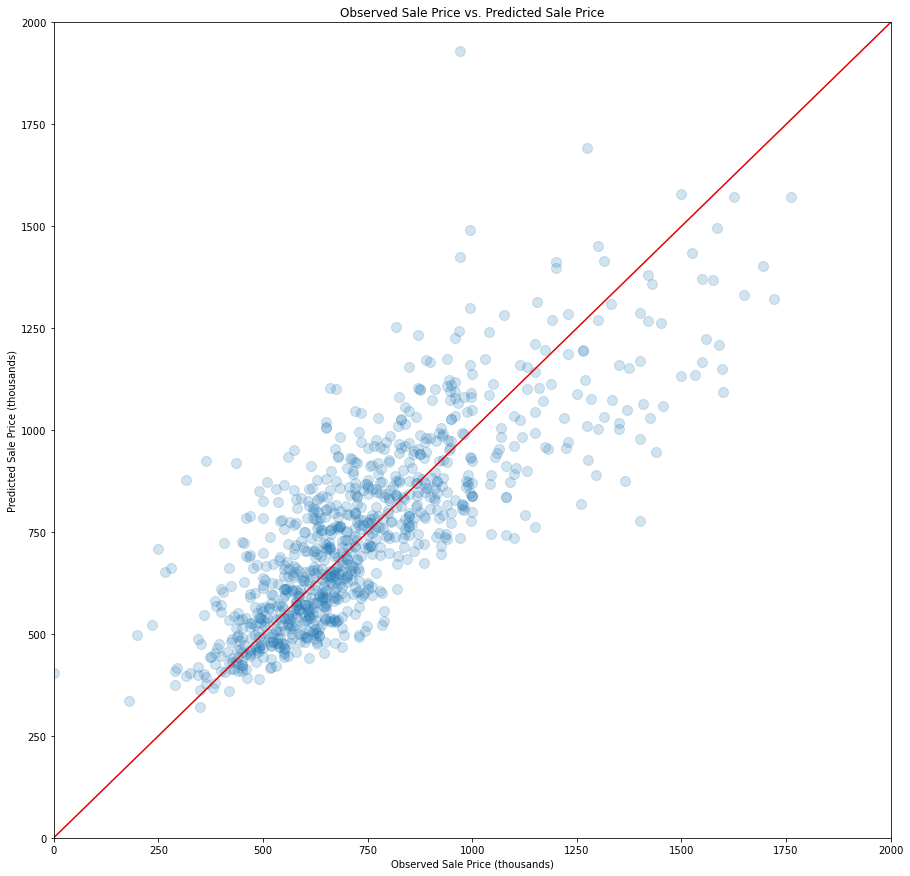

In [38]:
#Plot predicted values vs. observed values
PRED_VS_OBS=True

if PRED_VS_OBS:
    plt.figure(figsize=(15,15)) 
    plt.xlabel('Observed Sale Price (thousands)')
    plt.ylabel('Predicted Sale Price (thousands)')
    plt.title("Observed Sale Price vs. Predicted Sale Price")

    plt.ylim(0,2000)
    plt.xlim(0,2000)

    plt.scatter(nullless['sale_price']/1000,nullless['predictions']/1000, alpha=0.2, s=100)
    plt.plot(np.arange(0,2000),np.arange(0,2000),c='#e40000')

In [39]:
total=0
for item in nullless['sale_price']:
    total+=item
total/=len(nullless['sale_price'])

RMSE=mean_squared_error(nullless['sale_price'], nullless['predictions'], squared=False)
print(total, RMSE, RMSE/total)

792825.3764705883 254350.1105573748 0.3208147949169618


In [40]:
#253525.11415478506 0.3197742172222084

In [41]:
nullless=pd.read_csv('nullless.csv')
nullless.drop(['Unnamed: 0'],axis=1,inplace=True )

CONTINUOUS_HEATMAP=False

if CONTINUOUS_HEATMAP:
    corr = nullless.corr()

    sns.set(rc={"figure.figsize":(8, 8)})

    g = sns.heatmap(corr,cmap='seismic', annot=True,
            yticklabels=corr.columns)

    g.set_xticklabels(corr.columns,rotation=0)
    g.set_yticklabels(corr.columns,rotation=0)

In [42]:
def listing_dict(sq,bed,bath,lot,year,ptype,borough):
    d={}
    d['sqft']=[sq]
    d['beds']=[bed]
    d['baths']=[bath]
    d['lot_size']=[lot]
    d['year_built']=[year]
    
    d['Bronx']=[0]
    d['Brooklyn']=[0]
    d['Manhattan']=[0]
    d['Queens']=[0]
    d['Staten Island']=[0]
    
    d['Condo']=[0]
    d['Land']=[0]
    d['Multi-Family Home']=[0]
    d['Single Family Home']=[0]
    
    d[ptype]=[1]
    d[borough]=[1]

    df=pd.DataFrame.from_dict(d)
    return(df)


def predict_house_price(sq,bed,bath,lot,year,ptype,borough):
    inp=listing_dict(sq,bed,bath,lot,year,ptype,borough)

    print(f'Input: {sq} sqft, {bed} bedrooms, {bath} bathrooms, {lot} lot size, built in {year}, property type {ptype}, located in {borough}, NYC')
    standard=pd.read_csv('nulllessd.csv')
    standard.drop(['Unnamed: 0', 'New York', 'address'], axis=1, inplace=True)
    standard=standard.append(inp.loc[0])
    #Standardize all non-sale-price values
    scaler = StandardScaler()
    standard[['sqft', 'beds', 'baths', 'lot_size', 'year_built']] = scaler.fit_transform(standard[['sqft', 'beds', 'baths', 'lot_size', 'year_built']])
    
    prediction_model = standard.drop(['sale_price'], axis=1)
    out=model.predict(prediction_model)
    print('Predicted price:')
    return(out[len(out)-1])
    
    

In [43]:
#predict_house_price(1120,4,1,940,1290,'Single Family Home','Manhattan')

In [48]:
model.coef_

Coefficients

array([ 2.27124581e+05, -5.32473173e+04,  5.54596889e+04,  5.43734712e+04,
       -5.11654653e+02, -9.62565756e+05, -5.52135292e+05,  3.05105353e+06,
       -6.52186672e+05, -8.84165811e+05, -3.45591256e+04, -4.66168864e+04,
        6.71182948e+04,  1.40577172e+04])

In [49]:
model.intercept_

1552378.2479379964

In [44]:
# nulllessds=pd.read_csv('nulllessd.csv')
# nulllessds.drop(['Unnamed: 0'], axis=1, inplace=True)
# nulllessds

In [52]:
nullless

,sqft,beds,baths,lot_size,year_built,address,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Condo,Land,Multi-Family Home,Single Family Home,sale_price
0,-0.757950,0.294423,-1.198825,-0.671313,-1.243664,256 E 43rd St,0,1,0,0,0,0,0,0,1,407986.0
1,0.148085,0.294423,0.021314,-0.320319,0.704761,47 Ilyse Ct,0,0,0,0,1,0,0,0,1,700000.0
2,-0.681863,-0.356370,0.021314,0.139057,0.084807,370 Tysens Ln,0,0,0,0,1,0,0,0,1,700000.0
3,-0.364501,-0.356370,0.021314,-0.187577,0.380023,486 Castleton Ave,0,0,0,0,1,0,0,0,1,550000.0
4,-1.038270,-1.007162,-0.792112,-0.731967,0.763804,10 Sea Breeze Ln,0,0,0,0,1,1,0,0,0,380000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,-0.106206,0.294423,-0.385399,0.114199,0.439066,715 Katan Ave,0,0,0,0,1,0,0,0,1,700000.0
931,-0.191303,-0.356370,-0.385399,0.089341,-1.096056,40 Sterling Ave,0,0,0,0,1,0,0,0,1,650000.0
932,-0.469621,-0.356370,0.021314,-0.322805,0.468588,410 Montreal Ave,0,0,0,0,1,0,0,0,1,628000.0
933,-0.007093,-0.356370,0.021314,-0.221384,0.232415,23 Stobe Ave,0,0,0,0,1,0,0,0,1,540333.0
